In [225]:
import numpy as np
import pandas as pd

In [226]:
df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
176,ham,U still going to the mall?,NaN,NaN,NaN
2887,ham,I take it we didn't have the phone callon Frid...,NaN,NaN,NaN
4061,ham,Hi dear we saw dear. We both are happy. Where ...,NaN,NaN,NaN
1792,spam,WIN: We have a winner! Mr. T. Foley won an iPo...,NaN,NaN,NaN
931,ham,Congratulations ore mo owo re wa. Enjoy it and...,NaN,NaN,NaN


In [227]:
df.shape

(5575, 5)

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5575 entries, 0 to 5574
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5575 non-null   object
 1   v2          5575 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.9+ KB


In [229]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, axis=1)

In [230]:
df.sample(5)

,v1,v2
4951,spam,"Welcome to Select, an O2 service with added be..."
2515,ham,Bognor it is! Should be splendid at this time ...
2109,ham,Lara said she can loan me &lt;#&gt; .
5079,ham,\Keep ur problems in ur heart
5143,ham,Hi darlin im on helens fone im gonna b up the ...


In [231]:
df.rename(columns={'v1':'target', 'v2':'text'}, inplace=True)

In [232]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [233]:
df['target']=encoder.fit_transform(df['target'])

In [234]:
df.sample(5)

,target,text
2384,0,"Sorry, I'll call later"
4959,0,I want &lt;#&gt; rs da:)do you have it?
5453,0,Except theres a chick with huge boobs.
2069,1,"Eerie Nokia tones 4u, rply TONE TITLE to 8007 ..."
4258,0,Sad story of a Man - Last week was my b'day. M...


In [235]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [236]:
df.duplicated().sum()

403

In [237]:
df=df.drop_duplicates(keep='first')

In [238]:
df.duplicated().sum()

0

In [239]:
df.shape

(5172, 2)

In [240]:
df['target'].value_counts()

0    4516
1     656
Name: target, dtype: int64

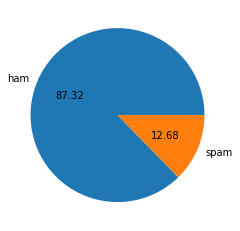

In [241]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()

In [242]:
import nltk

In [243]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [244]:
df['num_characters'] = df['text'].apply(len)

In [245]:
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [246]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [247]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences
3065,1,Get a brand new mobile phone by being an agent...,121,28,3
2999,0,Id onluy matters when getting on from offcampus,47,8,1
3830,0,Let's pool our money together and buy a bunch ...,116,40,3
405,0,"Haha get used to driving to usf man, I know a ...",60,15,1
4915,0,"Just dropped em off, omw back now",33,8,1


In [248]:
df[['num_sentences', 'num_words', 'num_characters']].describe()

,num_sentences,num_words,num_characters
count,5172.000000,5172.000000,5172.000000
mean,1.961524,18.456303,78.987046
std,1.432241,13.318736,58.222352
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,117.000000
max,38.000000,220.000000,910.000000


In [249]:
df[df['target'] == 0][['num_sentences', 'num_words', 'num_characters']].describe()

,num_sentences,num_words,num_characters
count,4516.000000,4516.000000,4516.000000
mean,1.815545,17.123339,70.459256
std,1.364098,13.491315,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


In [250]:
df[df['target'] == 1][['num_sentences', 'num_words', 'num_characters']].describe()

,num_sentences,num_words,num_characters
count,656.000000,656.000000,656.000000
mean,2.966463,27.632622,137.693598
std,1.486459,7.013015,30.236256
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,148.500000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


In [251]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

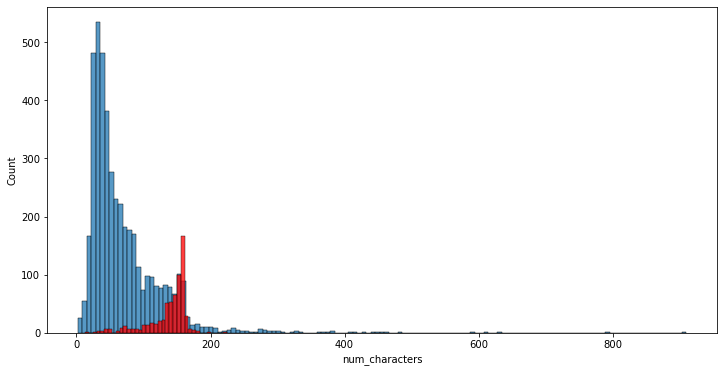

In [252]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color='red')

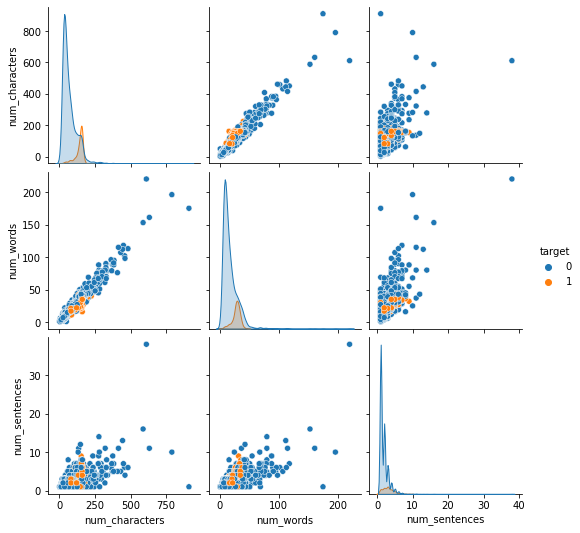

In [253]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

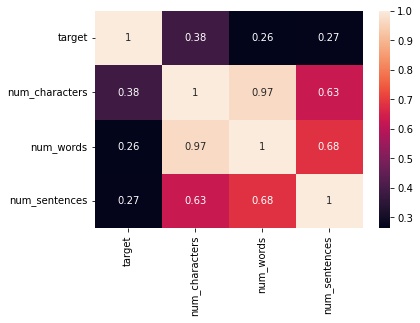

In [254]:
sns.heatmap(df.corr(), annot=True)

In [255]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [256]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text = y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [257]:
transform_text("Hi, This is Anshul Sharma")

'hi anshul sharma'

In [258]:
df['transformed_text'] = df['text'].apply(transform_text)

In [259]:
df.sample(5)

,target,text,num_characters,num_words,num_sentences,transformed_text
4432,0,Can u look 4 me in da lib i got stuff havent f...,56,15,1,u look 4 da lib got stuff havent finish yet
3287,1,Someone U know has asked our dating service 2 ...,139,29,4,someon u know ask date servic 2 contact cant g...
4028,0,"[Û_] anyway, many good evenings to u! s",40,12,2,anyway mani good even u
1826,0,Dude. What's up. How Teresa. Hope you have bee...,332,80,8,dude teresa hope okay didnt hear peopl call re...
2536,0,You do what all you like,24,6,1,like


In [260]:
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [261]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

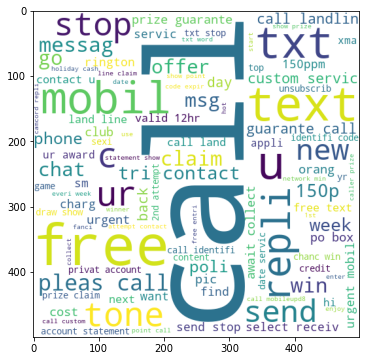

In [262]:
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)

In [263]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

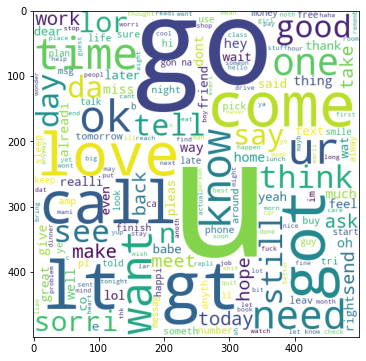

In [264]:
plt.figure(figsize=(15, 6))
plt.imshow(ham_wc)

In [265]:
spam_corpus = []
for message in df[df['target'] == 1]['transformed_text'].tolist():
    for word in message.split():
        spam_corpus.append(word)

In [266]:
len(spam_corpus)

9972

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


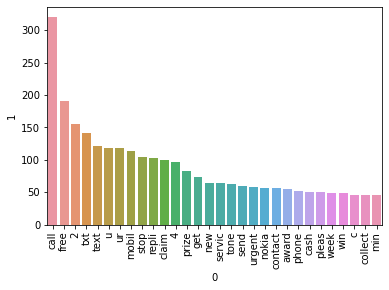

In [267]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0], pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [268]:
ham_corpus = []
for message in df[df['target'] == 0]['transformed_text'].tolist():
    for word in message.split():
        ham_corpus.append(word)

In [269]:
len(ham_corpus)

35402

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


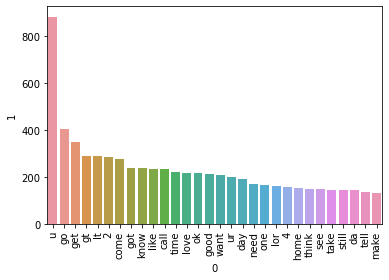

In [270]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [271]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [272]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [273]:
X.shape

(5172, 6715)

In [274]:
y = df['target'].values

In [275]:
y

array([0, 0, 1, ..., 1, 1, 1])

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [278]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [279]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [280]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8599033816425121
[[777 126]
 [ 19 113]]
0.47280334728033474


In [281]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9623188405797102
[[903   0]
 [ 39  93]]
1.0


In [282]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9719806763285024
[[898   5]
 [ 24 108]]
0.9557522123893806


In [283]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [284]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [285]:
clfs = {
    'SVC': svc,
    'KN': knc,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [286]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    return accuracy, precision

In [287]:
train_classifier(svc, X_train, y_train, X_test, y_test)

(0.9748792270531401, 0.9649122807017544)

In [288]:
accuracy_scores = []
precision_scores = []
for name, clf in clfs.items():
    current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)
    print('For ', name)
    print('Accuracy ', current_accuracy)
    print('Precision ', current_precision)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy  0.9748792270531401
Precision  0.9649122807017544
For  KN
Accuracy  0.9014492753623189
Precision  1.0
For  DT
Accuracy  0.9391304347826087
Precision  0.8484848484848485
For  LR
Accuracy  0.9545893719806763
Precision  0.9292929292929293
For  RF
Accuracy  0.978743961352657
Precision  1.0
For  AdaBoost
Accuracy  0.9632850241545894
Precision  0.9051724137931034
For  BgC
Accuracy  0.9671497584541063
Precision  0.8712121212121212
For  ETC
Accuracy  0.9739130434782609
Precision  0.972972972972973
For  GBDT
Accuracy  0.9526570048309179
Precision  0.9278350515463918
For  xgb
Accuracy  0.9690821256038648
Precision  0.9385964912280702


In [289]:
performance_df = pd.DataFrame({'Algorithms': clfs.keys(), 'Accuracy': accuracy_scores, 'Precision': precision_scores}).sort_values('Accuracy')

In [290]:
performance_df

,Algorithms,Accuracy,Precision
1,KN,0.901449,1.000000
2,DT,0.939130,0.848485
8,GBDT,0.952657,0.927835
3,LR,0.954589,0.929293
5,AdaBoost,0.963285,0.905172
6,BgC,0.967150,0.871212
9,xgb,0.969082,0.938596
7,ETC,0.973913,0.972973
0,SVC,0.974879,0.964912
4,RF,0.978744,1.000000


In [291]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))